In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
from math import sqrt
from statistics import mean

#Functions

In [27]:
def EuclideanDistance(a,b):
    '''
    returns the Euclidean Distance between two points

    parameters: list of two points containing their cordinates
    '''
    return sqrt(((np.array(a) -np.array(b))**2).sum())

def ManhattanDistance(a,b):
    '''
    returns the Manhattan Distance between two points

    parameters: list of two points containing their cordinates
    '''
    return abs(np.array(a) - np.array(b)).sum()

def SingleLinkage(a,b):
    '''
    Calculates the distance b/w each points of the two clusters passed as 
    parameters and Returns the Distance among the clusters according
    to the single linkage criteria
    '''

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return min(dis)

def CompleteLinkage(a,b):
    '''
    Calculates the distance b/w each points of the two clusters passed as 
    parameters and Returns the Distance among the clusters according
    to the complete linakge criteria
    '''

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return max(dis)

def AverageLinkage(a,b):
    '''
    Calculates the distance b/w each points of the two clusters passed as 
    parameters and Returns the Distance among the clusters according
    to the average linkage criteria
    '''

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return mean(dis)



#Dataset

In [28]:
# Loading the data
df = pd.read_csv('customers.csv',usecols = [3,4])
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#Single Linkage

In [29]:
# Initialisation of the lists for keeping record of clusters and their corresponding co-ordinates
##Nested list since a cluster can have multiple points/elements

clusters = [[i] for i in df.index] 
points = [ [list(i)] for i in df.values] 


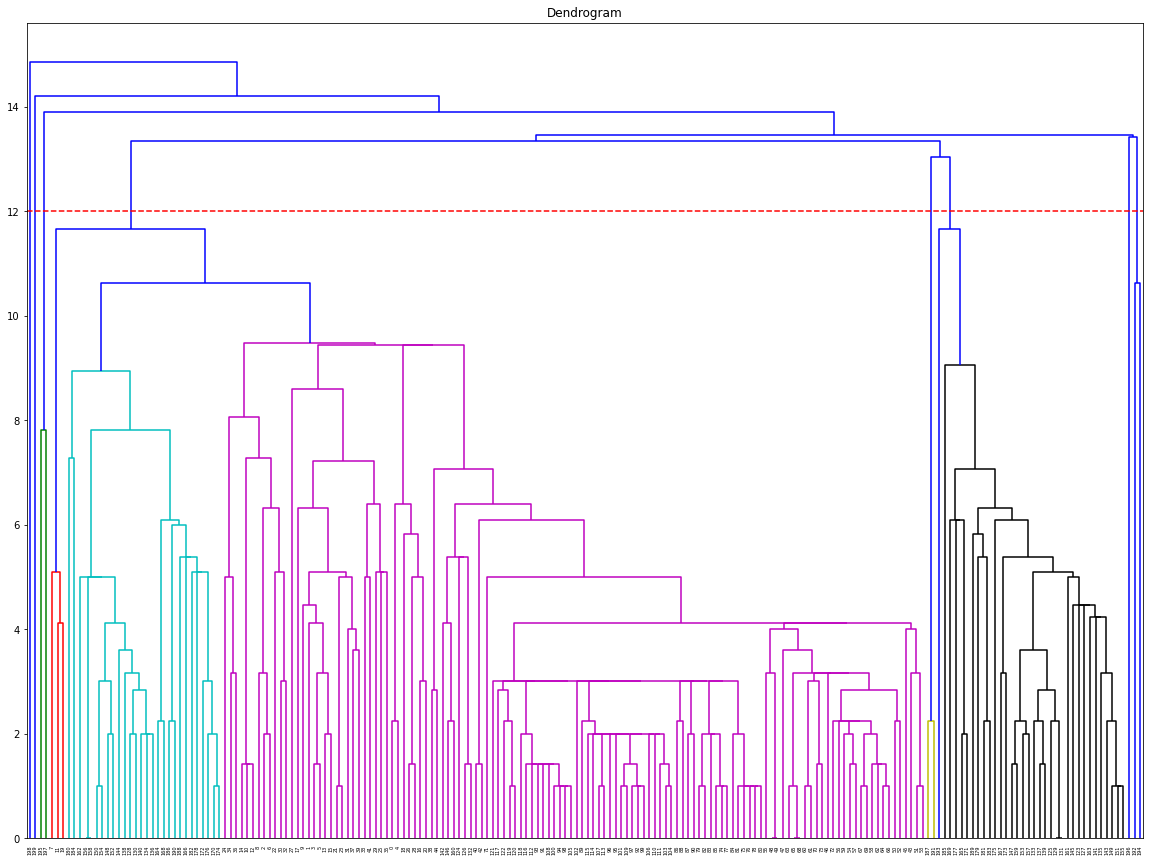

In [30]:
#Plotting Dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='single'))
plt.axhline(12,color ='red' , linestyle = '--')
plt.show()

In [31]:
#from the Dendrogram, the optimum no. of clusters = 8
n = 8

In [32]:
#Clustering

while len(clusters) > n:

    #Distance Matrix
    dm = np.zeros((len(clusters),len(clusters)))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = SingleLinkage(points[i],points[j])
               
            

    m = dm.min()
    min_pt= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clus_to_merge = [clusters[i] for i in set(min_pt[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clus_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    pt_to_merge = [points[i] for i in set(min_pt[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points in pt_to_merge for point in points]
    
    #adding new clusters and their cordinates
    clusters.append(new_cluster)
    points.append(new_point)

    #Removing the clusters which were merged
    for i in clus_to_merge:
        clusters.remove(i)   
    for i in pt_to_merge:
        points.remove(i)

   
    #print(len(clusters),clusters)
    

In [33]:
#Labeling

#To map the category of each training example in dataset
label = np.zeros((len(df.index)),dtype=int)
category= 1

for cluster in clusters:
    for point in cluster:
        label[point] = category
    category+=1

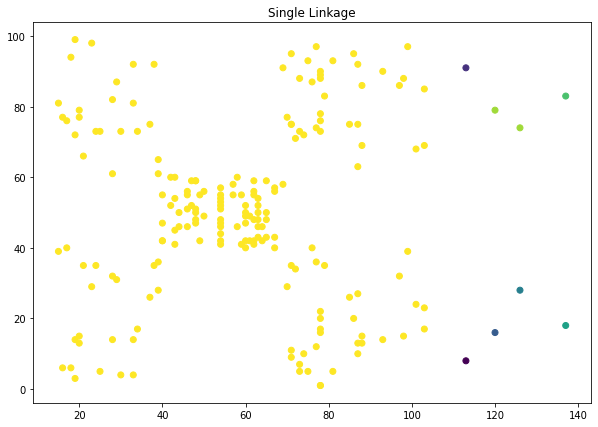

In [34]:
plt.figure(figsize=(10,7))
plt.title("Single Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()

#Complete Linkage

In [35]:
# Initialisation of the lists for keeping record of clusters and their corresponding co-ordinates
##Nested list since a cluster can have multiple points/elements

clusters = [[i] for i in df.index] 
points = [ [list(i)] for i in df.values] 


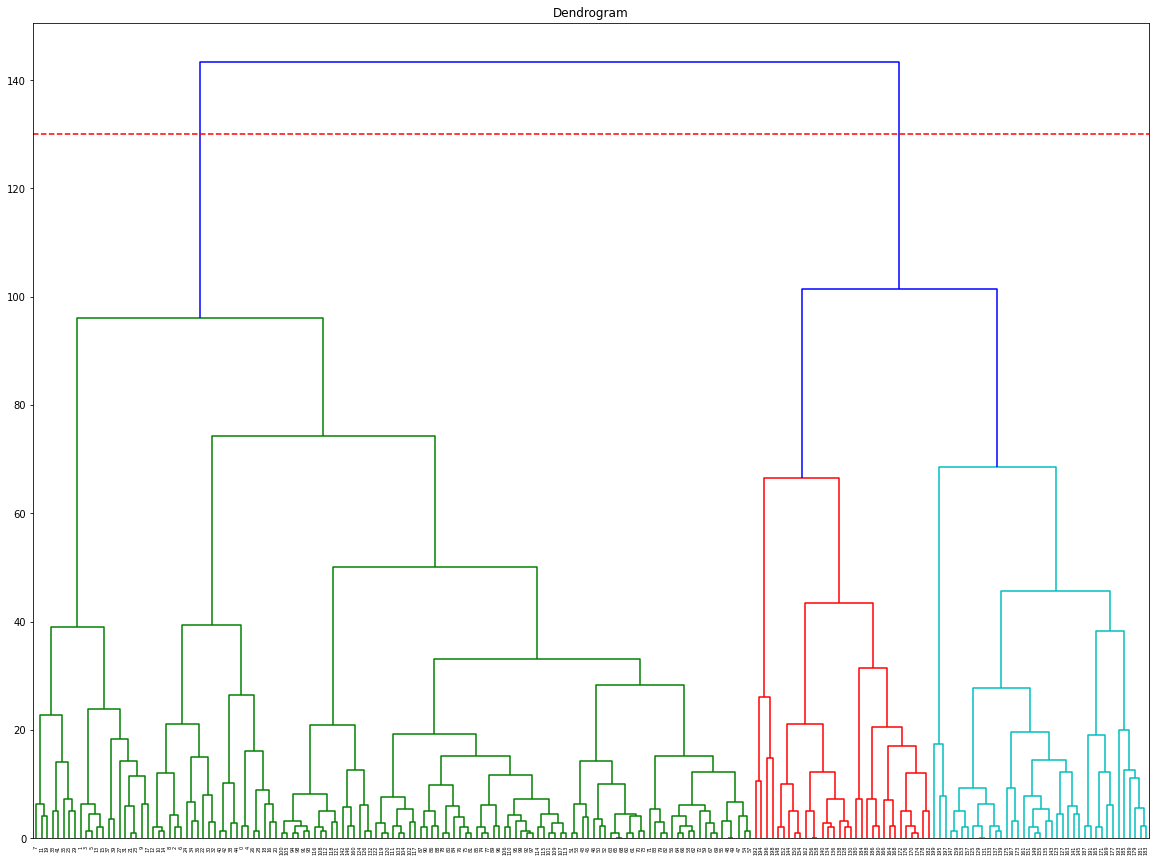

In [36]:
#Plotting dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='complete'))
plt.axhline(130,color ='red' , linestyle = '--')
plt.show()

In [37]:
#from the Dendrogram, the optimum no. of clusters = 2
n=2

In [38]:
#clustering

while len(clusters) > n:

    #Distance Matrix
    dm = np.zeros((len(clusters),len(clusters)))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = CompleteLinkage(points[i],points[j])
               
            

    m = dm.min()
    min_pt= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clus_to_merge = [clusters[i] for i in set(min_pt[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clus_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    pt_to_merge = [points[i] for i in set(min_pt[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points in pt_to_merge for point in points]
    
    #adding new clusters and their cordinates
    clusters.append(new_cluster)
    points.append(new_point)

    #Removing the clusters which were merged
    for i in clus_to_merge:
        clusters.remove(i)   
    for i in pt_to_merge:
        points.remove(i)

   
    #print(len(clusters),clusters)
    

In [39]:
#Labeling

#To map the category of each training example in dataset
label = np.zeros((len(df.index)),dtype=int)
category= 1

for cluster in clusters:
    for point in cluster:
        label[point] = category
    category+=1

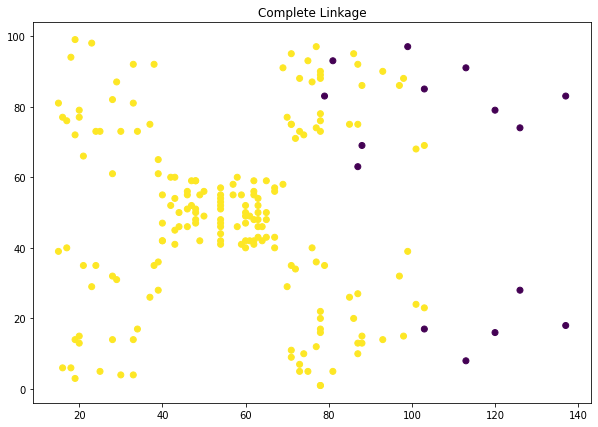

In [40]:
plt.figure(figsize=(10,7))
plt.title("Complete Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()

#Average Linkage

In [41]:
# Initialisation of the lists for keeping record of clusters and their corresponding co-ordinates
##Nested list since a cluster can have multiple points/elements

clusters = [[i] for i in df.index] 
points = [ [list(i)] for i in df.values] 


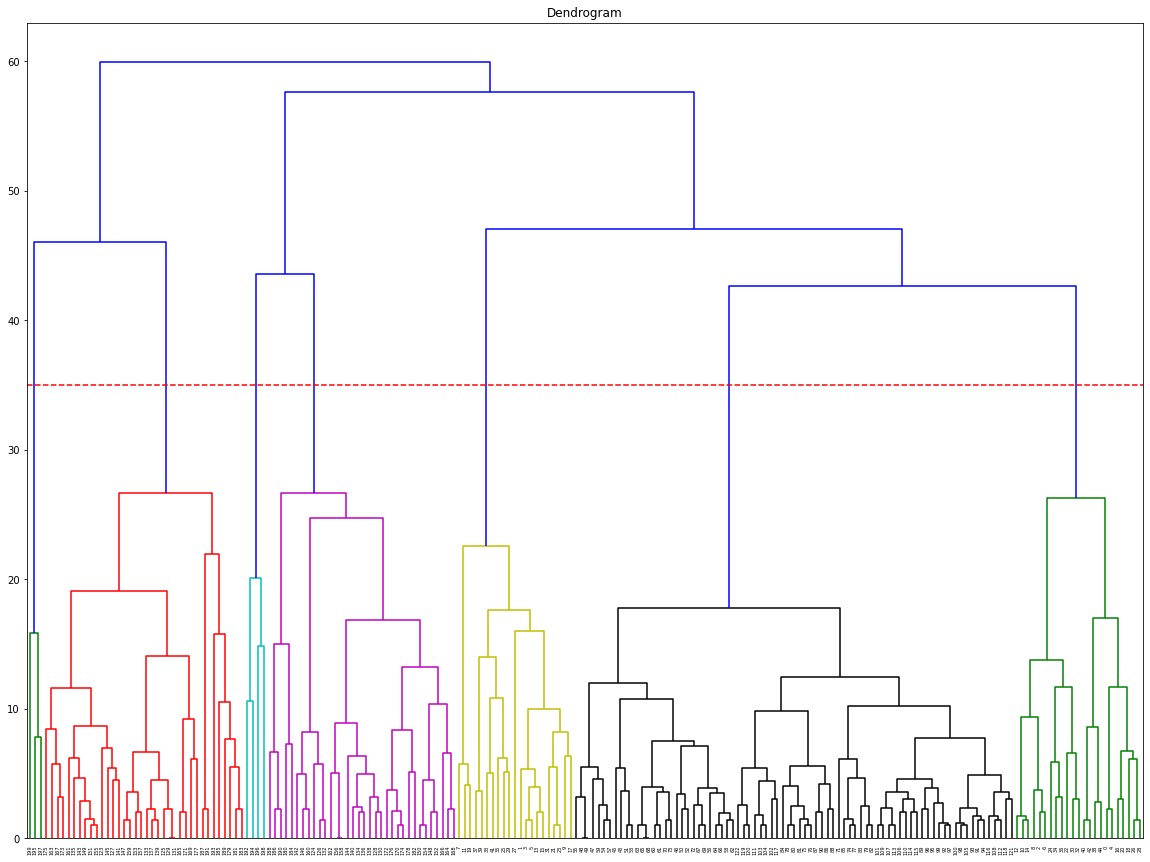

In [42]:
#Plotting dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='average'))
plt.axhline(35,color ='red' , linestyle = '--')
plt.show()

In [43]:
#from the Dendrogram, the optimum no. of clusters = 7
n = 7


In [44]:
#clustering

while len(clusters) > n:

    #Distance Matrix
    dm = np.zeros((len(clusters),len(clusters)))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = AverageLinkage(points[i],points[j])
               
            

    m = dm.min()
    min_pt= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clus_to_merge = [clusters[i] for i in set(min_pt[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clus_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    pt_to_merge = [points[i] for i in set(min_pt[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points in pt_to_merge for point in points]
    
    #adding new clusters and their cordinates
    clusters.append(new_cluster)
    points.append(new_point)

    #Removing the clusters which were merged
    for i in clus_to_merge:
        clusters.remove(i)   
    for i in pt_to_merge:
        points.remove(i)

   
    #print(len(clusters),clusters)
    

In [45]:
#Labeling

#To map the category of each training example in dataset
label = np.zeros((len(df.index)),dtype=int)
category= 1

for cluster in clusters:
    for point in cluster:
        label[point] = category
    category+=1

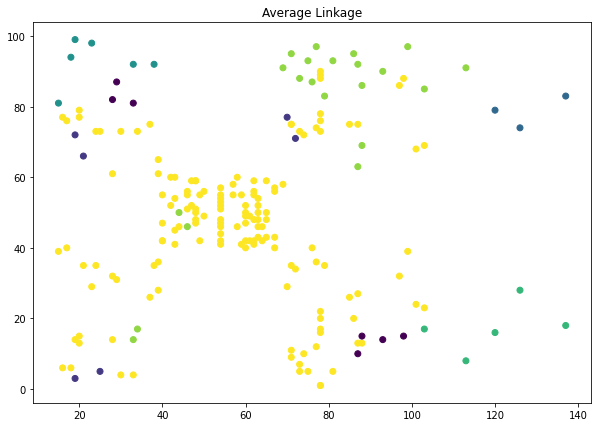

In [46]:
plt.figure(figsize=(10,7))
plt.title("Average Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()

#Ward Linkage

In [47]:
from sklearn.cluster import AgglomerativeClustering

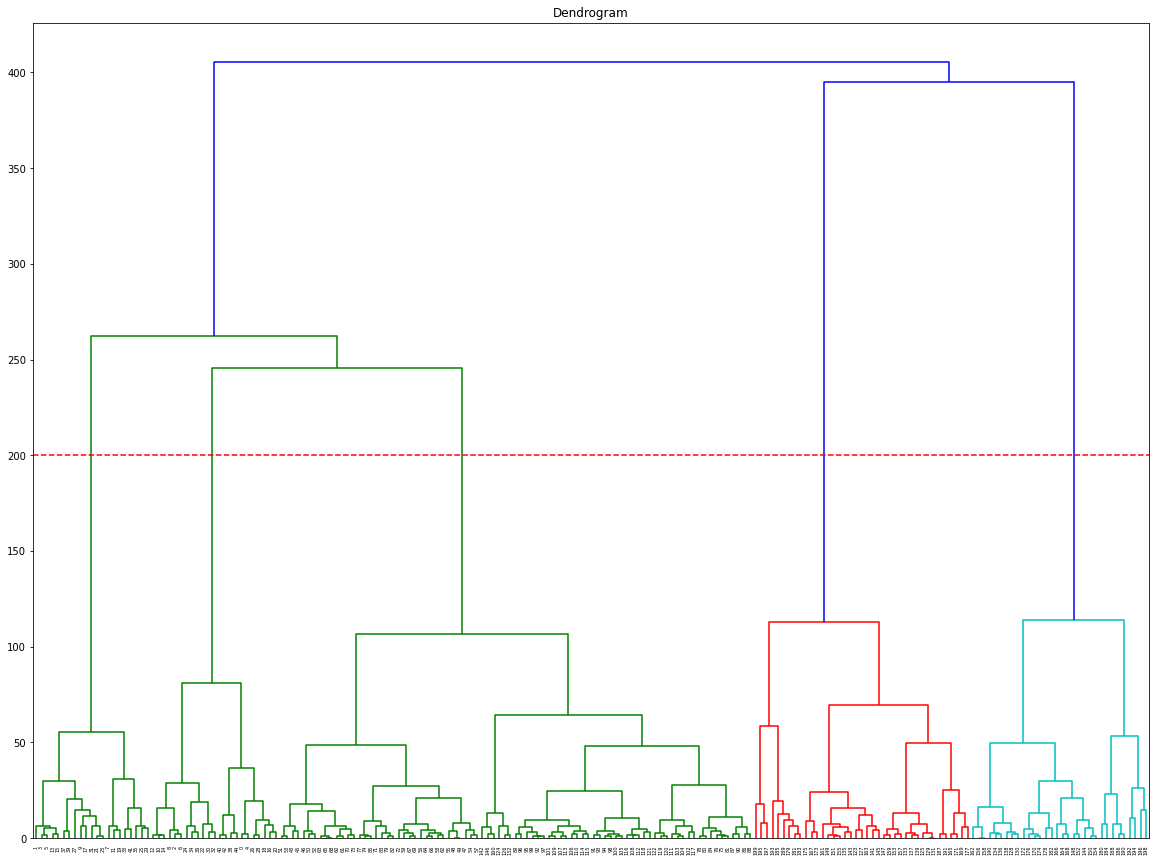

In [48]:
#Plotting dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='ward'))
plt.axhline(200,color ='red' , linestyle = '--')
plt.show()

In [49]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df.to_numpy())
label = model.labels_

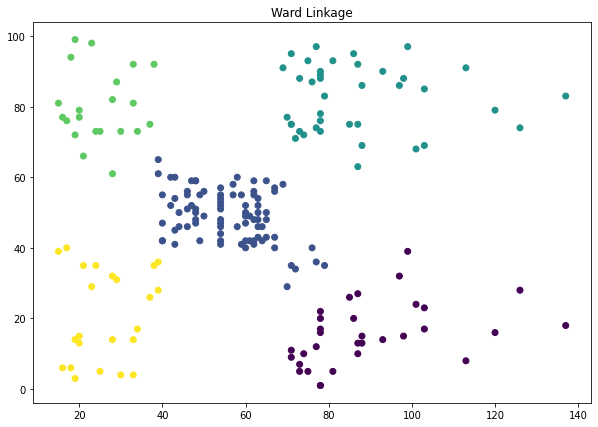

In [50]:
plt.figure(figsize=(10,7))
plt.title("Ward Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()